In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文字体（以 Windows 系统为例）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示异常问题[4,7](@ref)

pumpkins = pd.read_csv('US-pumpkins.csv')
print(pumpkins.head())

print(pumpkins.head())#查看数据的前5行
print(pumpkins.tail())#查看数据的后5行
print(pumpkins.info()) #查看数据的组织结构

print(pumpkins.isnull().sum()) #检查每列数据中的缺失值的数量
print(pumpkins["Package"].is_unique)




   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

数据预处理

经过深入研究原始数据后，我们发现，其中包含“每英寸”、“每箱”甚至“每个”的称重类型，这不是重量单位，它的价格是无意义的。南瓜似乎很难保持一致的重量，所以让我们通过只选择列中有字符串“'bushel”的南瓜来过滤它们，虽然缺失了很多数据，但它们对分析无用。

In [3]:
#统计"Package"列不同数据出现的频数以选择合适的数据
print(pumpkins["Package"].value_counts()) #统计"Package"列不同值出现的次数

#筛选只包含字符串“bushel”的数据
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
print(pumpkins)
print(len(pumpkins))

#提取月份数据与价格数据
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2 #price是平均价格
month = pd.DatetimeIndex(pumpkins['Date']).month #将日期列转换为日期并提取出月份数据

#提取数据至新列
new_pumpkins=pd.DataFrame({'Month':month,'Package':pumpkins['Package'],'LowPrice':pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.info()

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9) # loc()函数通过索引行标签索引行数据，即包含1 1/9的行，price = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2) #同上



Package
36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
35 lb cartons            42
bushel cartons           37
40 lb cartons            19
1 1/9 bushel crates      17
each                     17
bins                     13
50 lb sacks              11
50 lb cartons            10
bushel baskets           10
22 lb cartons            10
20 lb cartons             6
Name: count, dtype: int64
      City Name Type               Package    Variety Sub Variety  Grade  \
70    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
71    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
72    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
73    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
74    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
...         ...  ...                   ...        ...         ...    ...   
1738  ST. LOUI

数据可视化

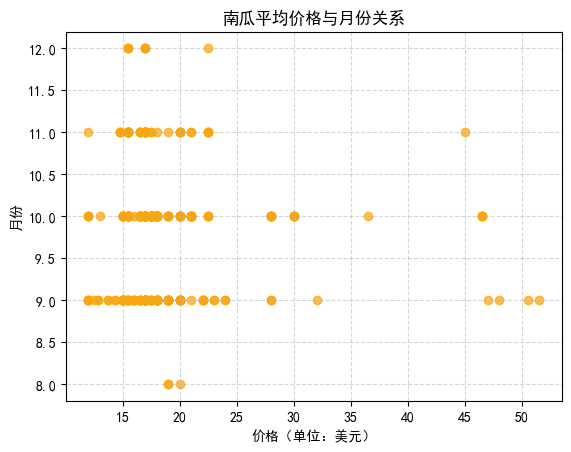

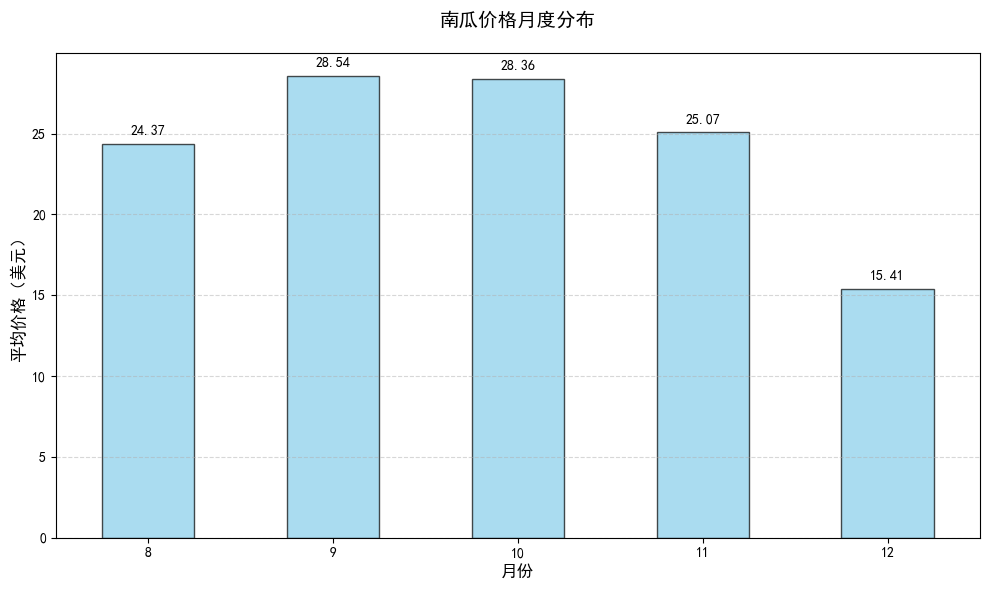

    Month               Package  LowPrice  High Price  Price
70      9  1 1/9 bushel cartons      15.0        15.0   13.5
71      9  1 1/9 bushel cartons      18.0        18.0   16.2
72     10  1 1/9 bushel cartons      18.0        18.0   16.2
73     10  1 1/9 bushel cartons      17.0        17.0   15.3
74     10  1 1/9 bushel cartons      15.0        15.0   13.5
<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 70 to 1742
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int32  
 1   Package     415 non-null    object 
 2   LowPrice    415 non-null    float64
 3   High Price  415 non-null    float64
 4   Price       415 non-null    float64
dtypes: float64(3), int32(1), object(1)
memory usage: 34.0+ KB


In [4]:
# 绘制散点图
plt.scatter(price, month, color='orange', alpha=0.7)
plt.title('南瓜平均价格与月份关系')  # 中文标题
plt.xlabel('价格（单位：美元）')     # X轴中文标签
plt.ylabel('月份')                 # Y轴中文标签
plt.grid(True, linestyle='--', alpha=0.5)  # 添加网格线增强可读性
plt.show()

#以分组聚合的方式创建分组直方图
ax = new_pumpkins.groupby(['Month'])['Price'].mean().plot(
    kind='bar',
    color='skyblue',  # 设置柱状图颜色
    edgecolor='black',  # 设置边框颜色
    alpha=0.7,  # 设置透明度
    figsize=(10, 6)  # 调整图形大小
)
plt.title('南瓜价格月度分布', fontsize=14, pad=20)  # 标题及间距
plt.xlabel('月份', fontsize=12)  # 横轴标签
plt.ylabel('平均价格（美元）', fontsize=12)  # 纵轴标签

# 旋转x轴标签为水平（0度）
plt.xticks(rotation=0, ha='center')  # ha参数控制水平对齐方式

# 在柱子上方添加数值标签（可选）
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",  # 显示两位小数
        (p.get_x() + p.get_width() / 2, p.get_height()),  # 标签位置
        ha='center',  # 水平居中
        va='bottom',  # 垂直对齐到柱子顶部
        xytext=(0, 5),  # 垂直偏移量
        textcoords='offset points',
        fontsize=10
    )

# 添加网格线（虚线）
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()  # 自动调整子图间距
plt.show()



print(new_pumpkins.head())#查看数据的前5行
new_pumpkins.info() #查看数据组织结构





数据预处理

C:\Users\13119\AppData\Local\Temp\ipykernel_23900\1974647692.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).dt.dayofyear


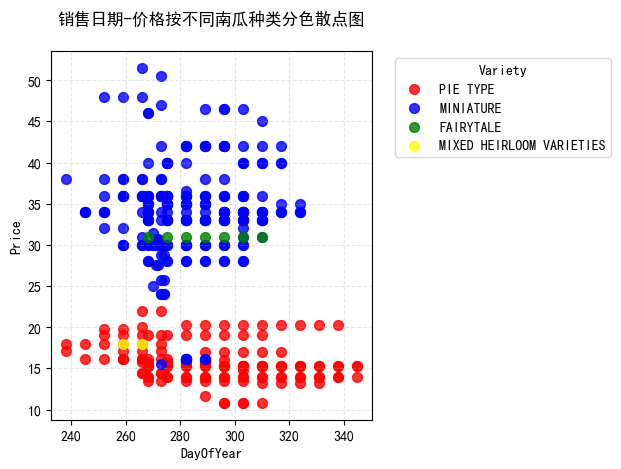

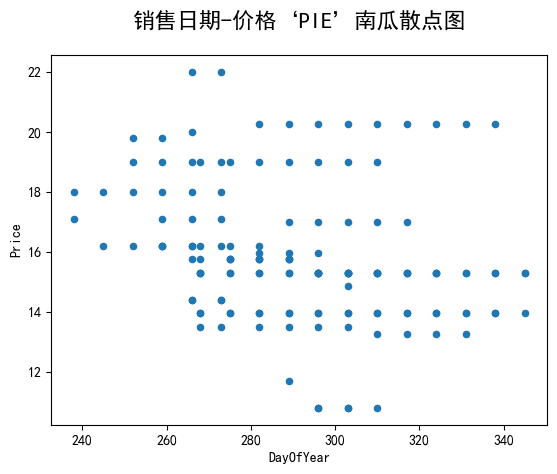

<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 70 to 1742
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   FAIRYTALE                 415 non-null    bool 
 1   MINIATURE                 415 non-null    bool 
 2   MIXED HEIRLOOM VARIETIES  415 non-null    bool 
 3   PIE TYPE                  415 non-null    bool 
dtypes: bool(4)
memory usage: 21.0 KB
None


C:\Users\13119\AppData\Local\Temp\ipykernel_23900\1974647692.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [5]:
#寻找相关性
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体（以 Windows 系统为例）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示异常问题

# 加载数据
pumpkins = pd.read_csv('US-pumpkins.csv')

# 数据预处理
# 筛选只包含字符串“bushel”的数据
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

# 提取月份数据与价格数据
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2  # price是平均价格
month = pd.DatetimeIndex(pumpkins['Date']).month  # 将日期列转换为日期并提取出月份数据

# 提取数据至新列
new_pumpkins = pd.DataFrame({
    'Month': month,
    'Package': pumpkins['Package'],
    'Variety': pumpkins['Variety'],  # 确保包含 Variety 列
    'LowPrice': pumpkins['Low Price'],
    'High Price': pumpkins['High Price'],
    'Price': price
})

# 处理特殊情况
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price / (1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price / (1/2)

# 添加年度日期序号
day_of_year = pd.to_datetime(pumpkins['Date']).dt.dayofyear
new_pumpkins['DayOfYear'] = day_of_year[pumpkins.index]


# 按品种分色绘制（完全匹配图片中的4种颜色）
ax = None
colors = ['red', 'blue', 'green', 'yellow']  # 严格对应图片中的颜色顺序
for i, var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = df.plot.scatter(
        x='DayOfYear',
        y='Price',
        ax=ax,
        c=colors[i],
        label=var,
        s=50,           # 点大小与图片一致
        alpha=0.8       # 适当透明度
    )

# 设置标题和坐标轴（与图片完全一致）
plt.title('销售日期-价格按不同南瓜种类分色散点图', pad=20)
plt.xlabel('DayOfYear')  # 保持英文标签与图片一致
plt.ylabel('Price')      # 保持英文标签与图片一致

# 调整图例位置（右上角）
plt.legend(bbox_to_anchor=(1.05, 1), title='Variety')

# 显示网格线（虚线样式）
plt.grid(True, linestyle='--', alpha=0.3)

# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 销售日期-价格‘PIE’南瓜散点图
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']
# 绘制散点图
pie_pumpkins.plot.scatter('DayOfYear', 'Price')
# 添加标题
plt.title('销售日期-价格‘PIE’南瓜散点图', fontsize=16, pad=20)
# 显示图形
plt.show()

#删除缺失值
pie_pumpkins.dropna(inplace=True)

X = pd.get_dummies(new_pumpkins['Variety'])
print(X.info())

构建模型

RMSE: 2.356 (14.9%)
R² Score: 0.042


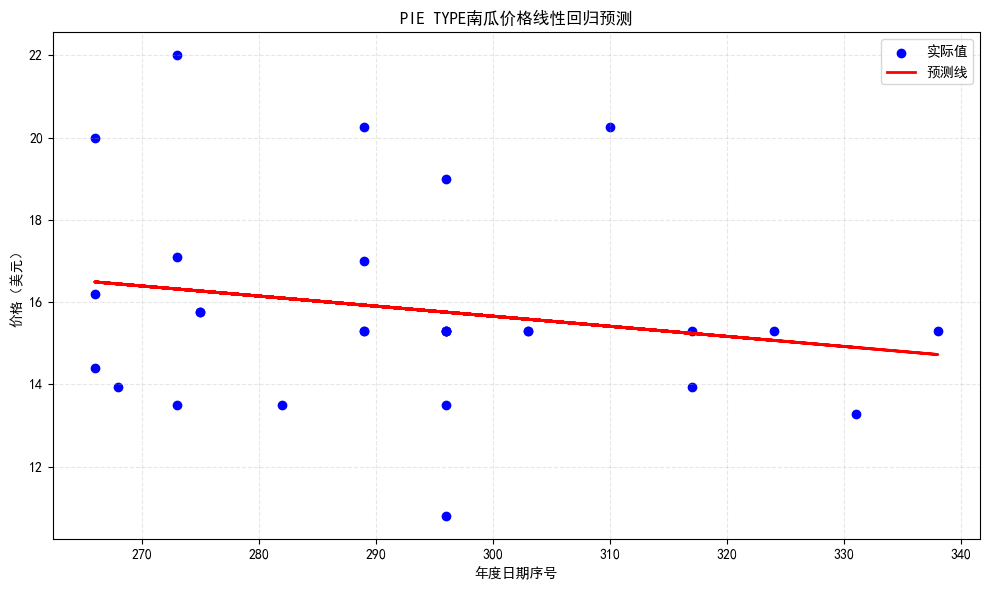


=== 模型评估结果 ===
RMSE: 4.755 (18.1%)
MAE: 3.211
测试集R²: 0.791
训练集R²: 0.767



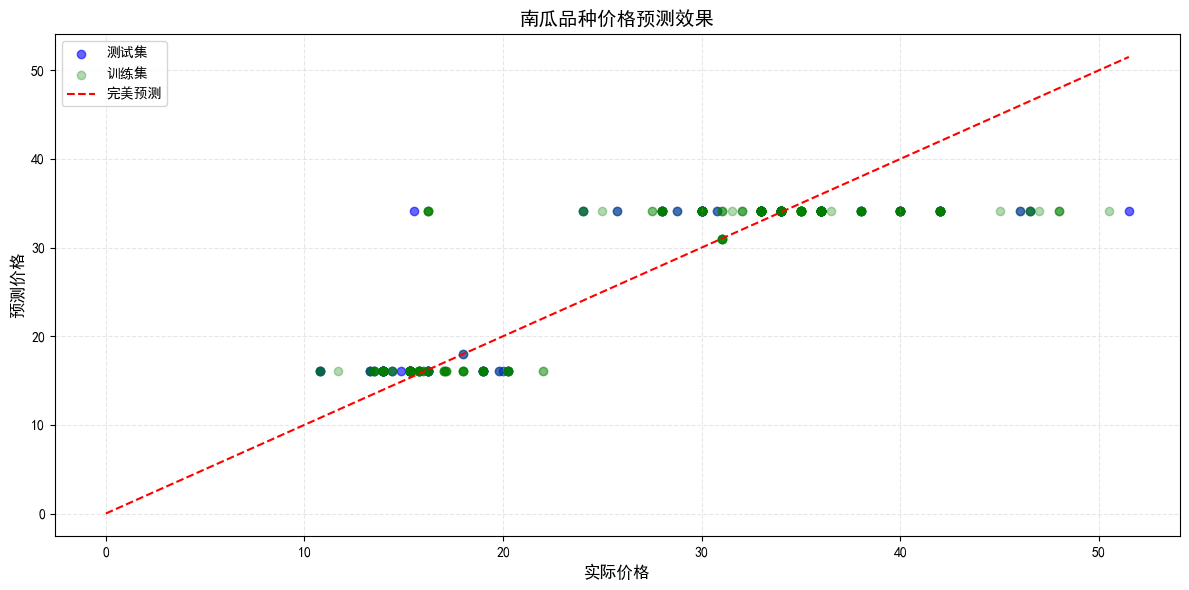

重要特征系数分析:
                               特征        系数
1                  var_MINIATURE  4.672037
8                var_MINIATURE^2  4.672037
3                   var_PIE TYPE -4.379135
13                var_PIE TYPE^2 -4.379135
2   var_MIXED HEIRLOOM VARIETIES -3.396451


In [6]:
#简单线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1, 1)  # 特征矩阵需要是二维
Y = pie_pumpkins['Price']  # 目标变量

# 2. 划分训练集/测试集（修正变量名）
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42  # 推荐使用42作为标准随机种子
)

# 3. 模型训练
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4. 预测与评估
pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

print(f'RMSE: {rmse:.3f} ({rmse/np.mean(pred)*100:.1f}%)')
print(f'R² Score: {r2:.3f}')

# 5. 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='实际值')
plt.plot(X_test, pred, color='red', linewidth=2, label='预测线')
plt.xlabel('年度日期序号')
plt.ylabel('价格（美元）')
plt.title('PIE TYPE南瓜价格线性回归预测')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. 数据预处理
# 确保数据包含必要列
# 品种独热编码（添加前缀增强可读性）
X = pd.get_dummies(new_pumpkins['Variety'], prefix='var')
Y = new_pumpkins['Price']

# 2. 划分训练集/测试集（分层抽样保持价格分布）
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42,  # 固定随机种子保证可复现性
    shuffle=True      # 打乱数据防止顺序偏差
)

# 3. 构建多项式回归管道（二次多项式+线性回归）
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),  # 不生成偏置项
    LinearRegression(fit_intercept=True)                # 模型自动计算截距
)

# 4. 模型训练与预测
pipeline.fit(X_train, Y_train)
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

# 5. 评估指标计算
rmse = np.sqrt(mean_squared_error(Y_test, test_pred))
mae = np.mean(np.abs(Y_test - test_pred))
r2 = r2_score(Y_test, test_pred)
score = pipeline.score(X_train, Y_train)  # 训练集R²

print(f'''
=== 模型评估结果 ===
RMSE: {rmse:.3f} ({rmse/np.mean(test_pred)*100:.1f}%)
MAE: {mae:.3f}
测试集R²: {r2:.3f}
训练集R²: {score:.3f}
''')

# 6. 可视化分析
plt.figure(figsize=(12, 6))

# 实际vs预测散点图
plt.scatter(Y_test, test_pred, c='blue', alpha=0.6, label='测试集')
plt.scatter(Y_train, train_pred, c='green', alpha=0.3, label='训练集')

# 理想拟合线
max_price = max(max(Y_test), max(Y_train))
plt.plot([0, max_price], [0, max_price], 'r--', label='完美预测')

plt.xlabel('实际价格', fontsize=12)
plt.ylabel('预测价格', fontsize=12)
plt.title('南瓜品种价格预测效果', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# 模型系数分析（展示前5个重要特征）
coef = pipeline.named_steps['linearregression'].coef_
features = pipeline.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X.columns)
coef_df = pd.DataFrame({'特征': features, '系数': coef}).sort_values('系数', key=abs, ascending=False)
print("重要特征系数分析:\n", coef_df.head(5))


销售日期-南瓜价格

In [7]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())#构建自动化流程 
pipeline.fit(X_train,Y_train)#训练模型 
pred = pipeline.predict(X_test)#在测试集上预测结果并保存在pred变量中 
rmse = np.sqrt(mean_squared_error(Y_test,pred))#计算RMSE 
print(f'RMSE指标: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)') 
score = pipeline.score(X_train,Y_train)#计算相关系数 
print('相关系数: ', score) 


RMSE指标: 4.75 (18.1%)
相关系数:  0.766733620146981


In [8]:
X = pd.get_dummies(new_pumpkins['Variety']) 
Y = new_pumpkins['Price'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)#以8：2的比例划分数据集与训练集 # setup and train the pipeline 
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())#构建流程化工具，其中PolynomialFeatures(2)是对输入数据进行2次多项式拟合，后者为构建线性回归模型 
pipeline.fit(X_train,Y_train) 
pred = pipeline.predict(X_test) 
rmse = np.sqrt(mean_squared_error(Y_test,pred)) 
print(f'RMSE指标: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)') 
score = pipeline.score(X_train,Y_train)
print('相关系数: ', score)

RMSE指标: 5.26 (19.8%)
相关系数:  0.7757064548947359


多元线性回归

In [10]:
X = pd.get_dummies(new_pumpkins['Variety']) \
    .join(new_pumpkins['Month']) \
    .join(pd.get_dummies(new_pumpkins['City'])) \
    .join(pd.get_dummies(new_pumpkins['Package']))
Y = new_pumpkins['Price']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
lin_reg = LinearRegression()#构建线性回归模型对象 
lin_reg.fit(X_train,Y_train)#训练模型

LinearRegression()

In [13]:
pred = lin_reg.predict(X_test)#将测试集上的预测值存储在pred中 
rmse = np.sqrt(mean_squared_error(Y_test,pred))#计算均方误差 
print(f'Mean error: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)')#输出均方误差的值以及错误率 score = lin_reg.score(X_train,Y_train)#计算回归系数 
print('Model determination: ', score)#输出回归系数的值

Mean error: 2.84 (10.6%)
Model determination:  0.7757064548947359


多元线性回归（多项式）

In [14]:

X = (pd.get_dummies(new_pumpkins['Variety'])
     .join(new_pumpkins['Month'])
     .join(pd.get_dummies(new_pumpkins['City']))
     .join(pd.get_dummies(new_pumpkins['Package'])))
Y = new_pumpkins['Price']
# 划分数据集与建模
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train, Y_train)
pred = pipeline.predict(X_test)

# 评估
rmse = np.sqrt(mean_squared_error(Y_test, pred))
print(f'RMSE: {rmse:.3f} ({rmse/np.mean(pred)*100:.1f}%)')
print('R² Score:', pipeline.score(X_train, Y_train))

RMSE: 2.230 (8.3%)
R² Score: 0.9658747228525119
